In [1]:
# Built In
from datetime import datetime

# Data analysis
import pandas as pd

# Plot
import plotly.graph_objs as go
import plotly.express as px

# Custom
from utils.fetch_data import get_data
from utils.bar_chart import format_df, get_color

from wordcloud import WordCloud
import plotly.subplots as sp
import plotly.graph_objects as go

## Plot Functions

In [2]:
def bar_plot(df, df_types, col='Value', top_k=10):
    filter_series = df.loc[df_types].sort_values(
        by=col, ascending=False)[:top_k]

    title = f'Covid "{df_types}" Stats for Top {top_k} Countries'

    # Create a list of traces for each country
    trace = go.Bar(x=filter_series.index,
                   y=filter_series[col],
                   marker=dict(color=get_color(df_types)))

    # Create the layout for the plot
    layout = go.Layout(
        title=title,
        xaxis=dict(title='Date'),
        yaxis=dict(title='No. of People'),
        barmode='stack'
    )

    # Create the figure and add the traces and layout
    fig = go.Figure(data=[trace], layout=layout)

    # Show the plot
    return fig


def stack_bar_plot(df, top_k=10):
    new_df = df.unstack(level=0)['Value']
    new_df['Total'] = new_df.sum(axis=1)

    sorted_df = new_df.sort_values(by='Total', ascending=False).iloc[:top_k]
    sorted_df = sorted_df.drop('Total', axis=1)

    # Create the stacked bar chart
    fig = px.bar(sorted_df, y=sorted_df.columns,
                 title='COVID-19 Cases by Country',
                 labels={'value': 'Number of People', 'variable': 'Status'},
                 barmode='stack')

    # Show the chart
    return fig


def wordcloud_plot(df, df_types):
    filter_df = df.loc[df_types].to_dict()['Value']

    data = df.loc['Confirmed'].to_dict()['Value']
    wordcloud = WordCloud(background_color='white',
                          max_words=len(data),
                          max_font_size=80,
                          scale=3,
                          random_state=200
                          ).generate_from_frequencies(data).recolor(random_state=63008)

    # Convert the word cloud to a numpy array
    cloud_array = wordcloud.to_array()

    # Create the plotly figure
    fig = sp.make_subplots(rows=1, cols=1)

    # Add the image trace to the figure
    fig.add_trace(go.Image(z=cloud_array), row=1, col=1)

    # Update the figure layout
    fig.update_layout(title=f'COVID-19 {df_types} Stats as a WordCloud', xaxis=dict(
        visible=False), yaxis=dict(visible=False))

    # Show the plot
    return fig

## Fetch Data

In [3]:
# Fetch Data Locally
full_df = get_data(online=False)
df = format_df(full_df)

Locally Data fetching


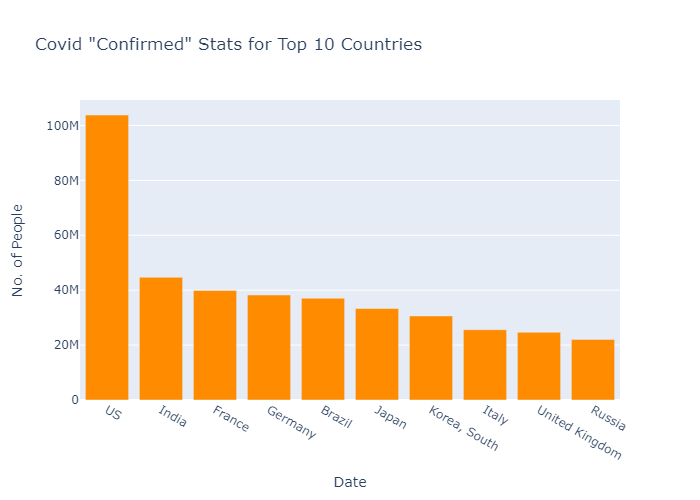

In [4]:
df_types = 'Confirmed'
top_k = 10
fig = bar_plot(df, df_types=df_types, top_k=top_k)
fig.show('png')

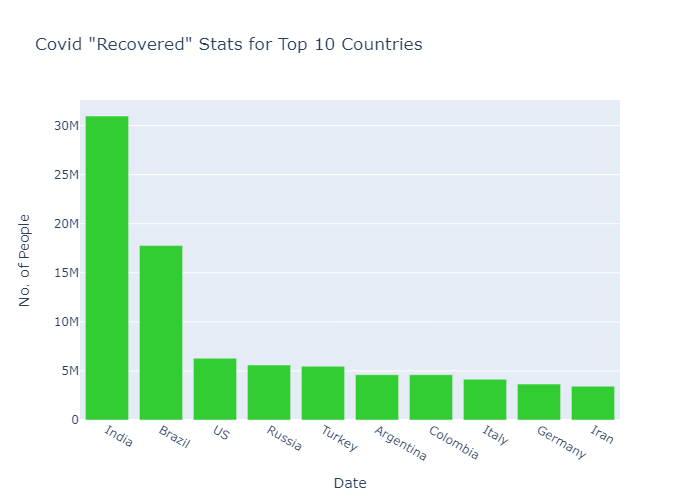

In [5]:
df_types = 'Recovered'
top_k = 10
fig = bar_plot(df, df_types=df_types, top_k=top_k)
fig.show('png')

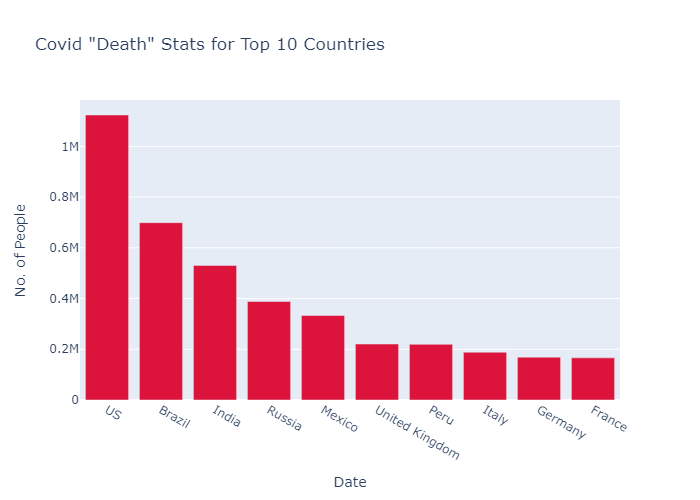

In [6]:
df_types = 'Death'
top_k = 10
fig = bar_plot(df, df_types=df_types, top_k=top_k)
fig.show('png')

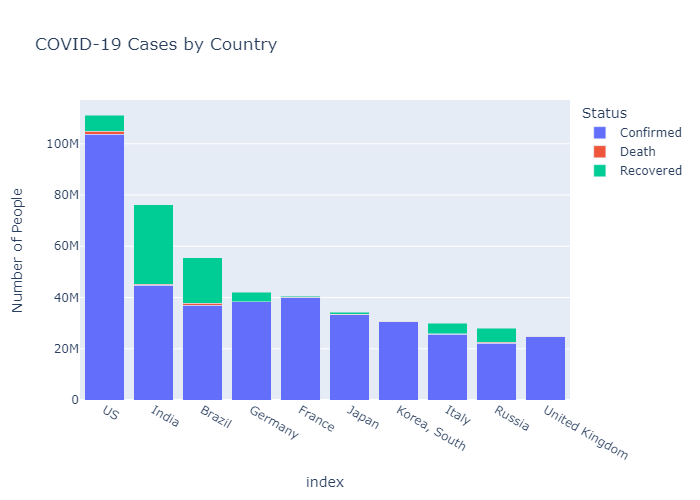

In [7]:
top_k = 10
fig = stack_bar_plot(df, top_k)
fig.show('png')

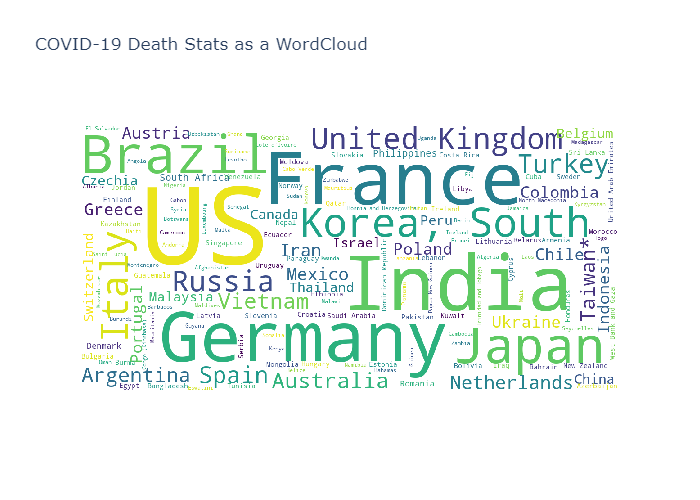

In [8]:
df_types = 'Death'
fig = wordcloud_plot(df, df_types)
fig.show('png')